# Práctica 3 - Séptima prueba

#### Pilar Navarro Ramírez

In [1]:
import pandas as pd

## Preprocesamiento

In [2]:
df_train=pd.read_csv("data/train.csv",na_values=[""])
df_test=pd.read_csv("data/test.csv",na_values=[""])

In [3]:
df_train.columns = [col.lower() for col in df_train]
df_test.columns = [col.lower() for col in df_test]

df_train_orig = df_train.copy()
df_test_orig = df_test.copy()

del df_train["id"]
del df_test["id"]

### Tratamos los datos perdidos

In [4]:
from sklearn import impute

In [5]:
del df_train['descuento']
del df_test['descuento']

In [6]:
df_train_replaced=df_train.copy()
imputer=impute.SimpleImputer(strategy="most_frequent")
values = imputer.fit_transform([df_train_replaced.asientos.values])
df_train_replaced.asientos.update(pd.Series(values[0]))

In [7]:
df_train_replaced=df_train_replaced.dropna()
df_train=df_train.dropna()

Separamos el atributo a predecir del resto de atributos en el conjunto de entrenamiento.

In [8]:
cols = [col for col in df_train.columns if col not in ['precio_cat']]    
df_train, df_train_obj= df_train[cols], df_train['precio_cat']
df_train_replaced, df_train_obj_replaced= df_train_replaced[cols], df_train_replaced['precio_cat']

### Normalización de los datos numéricos

In [9]:
from sklearn.preprocessing import MinMaxScaler

exc=["nombre","ciudad","combustible","tipo_marchas","mano","consumo","motor_cc","potencia",'precio_cat','id','descuento']
cols = [col for col in df_train_orig.columns if col not in exc]  


df_train_norm=df_train.copy()
df_train_norm_rpl=df_train_replaced.copy()
df_test_norm=df_test.copy()


for atributo in cols:
    data=pd.read_csv("data/"+atributo+".csv")
    data.columns = [col.lower() for col in data]
    scaler = MinMaxScaler().fit(data.values)
    train_values=df_train[atributo].values.reshape(-1,1)
    df_train_norm[atributo]=scaler.transform(train_values)
    train_values_rpl=df_train_replaced[atributo].values.reshape(-1,1)
    df_train_norm_rpl[atributo]=scaler.transform(train_values_rpl)
    test_values=df_test[atributo].values.reshape(-1,1)
    df_test_norm[atributo]=scaler.transform(test_values)
    

In [10]:
df_train_norm.tail()

,nombre,ciudad,año,kilometros,combustible,tipo_marchas,mano,consumo,motor_cc,potencia,asientos
4813,Volkswagen Vento Petrol Highline,C,0.666667,0.010312,Petrol,Manual,First,15.04 kmpl,1598 CC,103.6 bhp,0.5
4814,Maruti Swift VDI,E,0.761905,0.012785,Diesel,Manual,First,22.9 kmpl,1248 CC,74 bhp,0.5
4815,Porsche Panamera Diesel 250hp,H,0.761905,0.009210,Diesel,Automatic,First,18.18 kmpl,2967 CC,250 bhp,0.4
4817,Hyundai Xcent 1.2 VTVT S,E,0.809524,0.010088,Petrol,Manual,First,20.14 kmpl,1197 CC,81.86 bhp,0.5
4818,Maruti Ertiga ZDI,B,0.714286,0.011512,Diesel,Manual,First,20.77 kmpl,1248 CC,88.8 bhp,0.7


### 'Transformación' de variables categóricas a binarias

In [11]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

categorical=["nombre","ciudad","combustible","tipo_marchas","mano","consumo","motor_cc","potencia"]
cols = [col for col in df_train.columns if col not in categorical]    

df_train_num=df_train_norm.copy()
df_train_num_rpl=df_train_norm_rpl.copy()
df_test_num=df_test_norm.copy()

df_train_num=np.array(df_train_num[cols])
df_train_num_rpl=np.array(df_train_num_rpl[cols])
df_test_num=np.array(df_test_num[cols])

for atributo in categorical:
    data=pd.read_csv("data/"+atributo+".csv")
    data.columns = [col.lower() for col in data]
    enc = OneHotEncoder().fit(data[atributo].values.reshape(-1,1))

    #Conjunto de entrenamiento con ambos preprocesamientos
    enc_train=enc.transform(df_train[atributo].values.reshape(-1,1)).toarray()        
    df_train_num=np.hstack((df_train_num,enc_train))
    
    enc_train_rpl=enc.transform(df_train_replaced[atributo].values.reshape(-1,1)).toarray()
    df_train_num_rpl=np.hstack((df_train_num_rpl,enc_train_rpl))

    
    #Conjunto de test
    enc_test=enc.transform(df_test[atributo].values.reshape(-1,1)).toarray()
    df_test_num=np.hstack((df_test_num,enc_test))
                          
df_train_num=pd.DataFrame(df_train_num)
df_train_num_rpl=pd.DataFrame(df_train_num_rpl)
df_test_num=pd.DataFrame(df_test_num)

In [12]:
df_train_num.head()

,0,1,2,3,4,5,6,7,8,9,...,2838,2839,2840,2841,2842,2843,2844,2845,2846,2847
0,0.666667,0.012743,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.857143,0.000712,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.857143,0.003974,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.714286,0.008609,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.904762,0.006432,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
df_train_num.describe()

,0,1,2,3,4,5,6,7,8,9,...,2838,2839,2840,2841,2842,2843,2844,2845,2846,2847
count,4001.000000,4001.000000,4001.000000,4001.0,4001.0,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,...,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000
mean,0.745302,0.009001,0.529468,0.0,0.0,0.000250,0.000250,0.000250,0.000250,0.000250,...,0.000250,0.000500,0.000750,0.002999,0.026243,0.000250,0.000500,0.001500,0.002749,0.001000
std,0.145271,0.016793,0.081295,0.0,0.0,0.015809,0.015809,0.015809,0.015809,0.015809,...,0.015809,0.022355,0.027376,0.054690,0.159878,0.015809,0.022355,0.038701,0.052368,0.031607
min,0.000000,0.000000,0.200000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.666667,0.005051,0.500000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.761905,0.008011,0.500000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.857143,0.011051,0.500000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
df_test_num.describe()

,0,1,2,3,4,5,6,7,8,9,...,2838,2839,2840,2841,2842,2843,2844,2845,2846,2847
count,1159.000000,1159.000000,1159.000000,1159.000000,1159.0,1159.0,1159.0,1159.0,1159.000000,1159.0,...,1159.0,1159.000000,1159.000000,1159.000000,1159.000000,1159.0,1159.0,1159.000000,1159.000000,1159.0
mean,0.699618,0.009109,0.525798,0.000863,0.0,0.0,0.0,0.0,0.000863,0.0,...,0.0,0.000863,0.000863,0.000863,0.009491,0.0,0.0,0.002588,0.005177,0.0
std,0.171870,0.005493,0.079172,0.029374,0.0,0.0,0.0,0.0,0.029374,0.0,...,0.0,0.029374,0.029374,0.029374,0.097000,0.0,0.0,0.050833,0.071795,0.0
min,0.000000,0.000066,0.200000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0
25%,0.571429,0.005400,0.500000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0
50%,0.714286,0.008435,0.500000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0
75%,0.857143,0.011512,0.500000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0
max,1.000000,0.073822,0.800000,1.000000,0.0,0.0,0.0,0.0,1.000000,0.0,...,0.0,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,0.0


Eliminamos las columnas que son todo nula.

In [15]:
cols = [col for col in df_train_num.columns if df_train_num[col].max()!=0.0]
df_train_num=df_train_num[cols]
df_test_num=df_test_num[cols]
df_train_num_rpl=df_train_num_rpl[cols]

### Oversampling

In [16]:
from collections import Counter
Counter(df_train_obj)

Counter({3: 1825, 2: 502, 4: 834, 5: 637, 1: 203})

In [17]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=10)
df_train_over, df_train_obj_over = smote.fit_resample(df_train_num, df_train_obj)
df_train_over_rpl, df_train_obj_over_rpl = smote.fit_resample(df_train_num_rpl, df_train_obj_replaced)
Counter(df_train_obj_over)

Counter({3: 1825, 2: 1825, 4: 1825, 5: 1825, 1: 1825})

In [18]:
df_train_over.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Columns: 2387 entries, 0 to 2847
dtypes: float64(2387)
memory usage: 166.2 MB


### Undersampling

In [19]:
from imblearn.under_sampling import EditedNearestNeighbours
resampler=EditedNearestNeighbours(n_neighbors=5)
df_train_under, df_train_obj_under = resampler.fit_resample(df_train_num, df_train_obj)
df_train_under_rpl, df_train_obj_under_rpl = resampler.fit_resample(df_train_num_rpl, df_train_obj_replaced)
Counter(df_train_obj_under)

Counter({1: 203, 2: 31, 3: 813, 4: 256, 5: 409})

In [20]:
df_train_under.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1712 entries, 0 to 1711
Columns: 2387 entries, 0 to 2847
dtypes: float64(2387)
memory usage: 31.2 MB


## Aplicación de los algoritmos

In [21]:
import numpy as np

from sklearn.model_selection import cross_val_score

def cross_validation(clf,x,y,mostrar=False):
    scores=cross_val_score(clf,x,y,scoring='accuracy',cv=5)
    accuracy=np.mean(scores)  
    if mostrar:
        print("Accuracy: ", accuracy)
    return accuracy

In [21]:
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier


extra=ExtraTreesClassifier(random_state=10)
gradient=GradientBoostingClassifier(random_state=10,max_features='auto')
svc=LinearSVC(random_state=10)
knn=KNeighborsClassifier()
tree=DecisionTreeClassifier(random_state=10)
forest=RandomForestClassifier(random_state=10)
NN=MLPClassifier(random_state=10,max_iter=10000)

clfs=[svc,knn,tree,forest,NN,extra,gradient]
for clf in clfs:
    print("ONE_HOT_ENCODING")
    print("-------------")
    print("Datos normalizados con todos nulos eliminados: ")
    print(clf)
    cross_validation(clf, df_train_num, df_train_obj,True)
    print("Datos normalizados con nulos en asientos reemplazados: ")
    print(clf)
    cross_validation(clf,df_train_num_rpl,df_train_obj_replaced,True)
    print("OVERSAMPLING")
    print("-------------")
    print("Datos normalizados con todos nulos eliminados: ")
    print(clf)
    cross_validation(clf, df_train_over, df_train_obj_over,True)
    print("Datos normalizados con nulos en asientos reemplazados: ")
    print(clf)
    cross_validation(clf,df_train_over_rpl,df_train_obj_over_rpl,True)
    print("UNDERSAMPLING")
    print("-------------")
    print("Datos normalizados con todos nulos eliminados: ")
    print(clf)
    cross_validation(clf, df_train_under, df_train_obj_under,True)
    print("Datos normalizados con nulos en asientos reemplazados: ")
    print(clf)
    cross_validation(clf,df_train_under_rpl,df_train_obj_under_rpl,True)
   

ONE_HOT_ENCODING
-------------
Datos normalizados con todos nulos eliminados: 
LinearSVC(random_state=10)
Accuracy:  0.7528117977528089
Datos normalizados con nulos en asientos reemplazados: 
LinearSVC(random_state=10)
Accuracy:  0.7527749600626849
OVERSAMPLING
-------------
Datos normalizados con todos nulos eliminados: 
LinearSVC(random_state=10)
Accuracy:  0.8897534246575342
Datos normalizados con nulos en asientos reemplazados: 
LinearSVC(random_state=10)
Accuracy:  0.8853448275862069
UNDERSAMPLING
-------------
Datos normalizados con todos nulos eliminados: 
LinearSVC(random_state=10)
Accuracy:  0.9567251461988304
Datos normalizados con nulos en asientos reemplazados: 
LinearSVC(random_state=10)
Accuracy:  0.9539020090415598
ONE_HOT_ENCODING
-------------
Datos normalizados con todos nulos eliminados: 
KNeighborsClassifier()
Accuracy:  0.748813670411985
Datos normalizados con nulos en asientos reemplazados: 
KNeighborsClassifier()
Accuracy:  0.7475989017997607
OVERSAMPLING
-------

### Configuración de los parámetros

##### LinearSVC

In [1]:
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
def tune_svc(max_value,data,obj):
    acc=[]
    for i in range(1,max_value):
        svc=LinearSVC(random_state=10,C=i,max_iter=100000)
        acc.append(cross_validation(svc,data,obj))

    fig, ax =plt.subplots(figsize=(15,5))
    ax.plot(range(1,max_value), acc)
    ax.set_title('Linear SVC')
    ax.set_xlabel('Valor parámetro')
    ax.set_ylabel('Accuracy')
    plt.show()

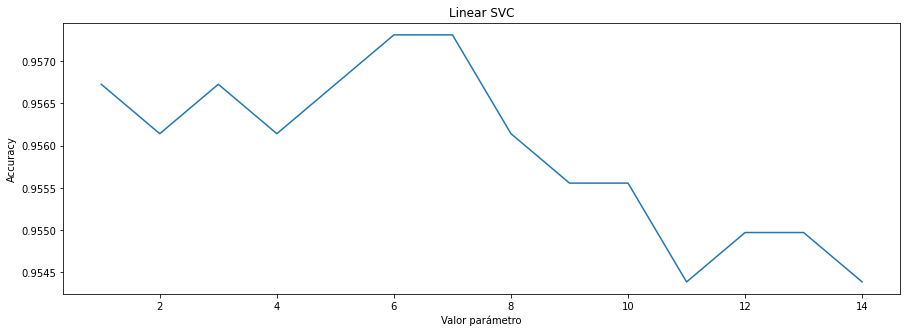

In [27]:
tune_svc(15,df_train_under,df_train_obj_under)

In [55]:
svc=LinearSVC(random_state=10,C=6.5,max_iter=100000)
cross_validation(svc, df_train_under,df_train_obj_under,True)

Accuracy:  0.9573099415204679


0.9573099415204679

In [56]:
svc=LinearSVC(random_state=10,C=7,max_iter=100000)
cross_validation(svc, df_train_under,df_train_obj_under,True)

Accuracy:  0.9573099415204679


0.9573099415204679

In [57]:
svc=LinearSVC(random_state=10,C=6,max_iter=100000)
cross_validation(svc, df_train_under,df_train_obj_under,True)

Accuracy:  0.9573099415204679


0.9573099415204679

##### Knn

In [28]:
from sklearn.neighbors import KNeighborsClassifier

def tune_knn(max_value,data,obj):
    acc=[]
    for i in range(2,max_value):
        knn=KNeighborsClassifier(n_neighbors=i)
        acc.append(cross_validation(knn,data,obj))

    fig, ax =plt.subplots(figsize=(15,5))
    ax.plot(range(2,max_value), acc)
    ax.set_title('vecino más cercano')
    ax.set_xlabel('Num vecinos')
    ax.set_ylabel('Accuracy')
    plt.show()

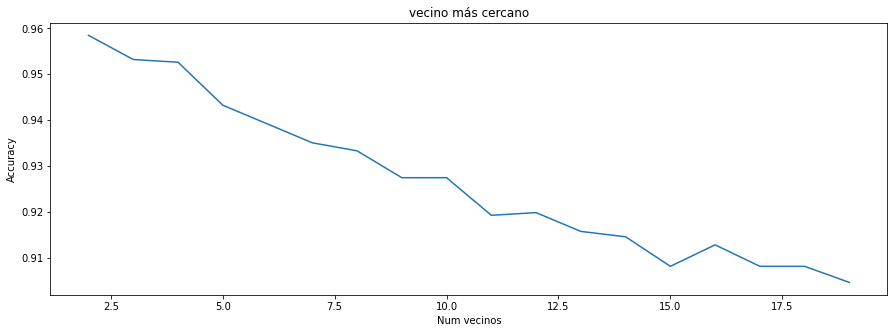

In [30]:
tune_knn(20,df_train_under,df_train_obj_under)

In [61]:
knn=KNeighborsClassifier(n_neighbors=2)
cross_validation(knn,df_train_under,df_train_obj_under)

0.9584795321637427

In [62]:
knn=KNeighborsClassifier(n_neighbors=3)
cross_validation(knn,df_train_under,df_train_obj_under)

0.9532163742690057

## Stacking

In [67]:
from sklearn.ensemble import StackingClassifier

extra=ExtraTreesClassifier(random_state=10)
svc=LinearSVC(random_state=10,C=6,max_iter=100000)
knn=KNeighborsClassifier(n_neighbors=2)
forest=RandomForestClassifier(random_state=10)
NN=MLPClassifier(random_state=10,max_iter=10000)

estimators = [('Linear SVC', svc),
     ('forest', forest),('extra_trees', extra),('Red Neuronal',NN),('knn',knn)]

clf = StackingClassifier(estimators=estimators, final_estimator=forest,cv=5)
cross_validation(clf, df_train_under, df_train_obj_under,True)

Accuracy:  0.9719298245614034


0.9719298245614034

In [68]:
estimators = [('Linear SVC', svc),
     ('forest', forest),('extra_trees', extra),('Red Neuronal',NN)]

clf = StackingClassifier(estimators=estimators, final_estimator=forest,cv=5)
cross_validation(clf, df_train_under, df_train_obj_under,True)

Accuracy:  0.9701754385964912


0.9701754385964912

In [70]:
gradient=GradientBoostingClassifier(random_state=10,max_features='auto')

estimators = [('Linear SVC', svc),
     ('forest', forest),('extra_trees', extra),('Red Neuronal',NN),('knn',knn),('Gradient Boosting',gradient)]

clf = StackingClassifier(estimators=estimators, final_estimator=forest,cv=5)
cross_validation(clf, df_train_under, df_train_obj_under,True)

Accuracy:  0.9701754385964911


0.9701754385964911

Probamos con los datos preprocesados con oversampling y los clasificadores con parámetros por defecto.

In [42]:
extra=ExtraTreesClassifier(random_state=10)
svc=LinearSVC(random_state=10,max_iter=100000)
forest=RandomForestClassifier(random_state=10)
NN=MLPClassifier(random_state=10,max_iter=10000)


estimators = [('Linear SVC', svc),
     ('forest', forest),('extra_trees', extra),('Red Neuronal',NN)]

clf = StackingClassifier(estimators=estimators, final_estimator=forest,cv=5,n_jobs=6)
cross_validation(clf, df_train_over, df_train_obj_over,True)

Accuracy:  0.9505753424657535


0.9505753424657535

In [22]:
extra=ExtraTreesClassifier(random_state=10)
gradient=GradientBoostingClassifier(random_state=10,max_features='auto')
svc=LinearSVC(random_state=10)
knn=KNeighborsClassifier()
tree=DecisionTreeClassifier(random_state=10)
forest=RandomForestClassifier(random_state=10)
NN=MLPClassifier(random_state=10,max_iter=10000)

estimators = [('Linear SVC', svc),
     ('forest', forest),('extra_trees', extra)]

clf = StackingClassifier(estimators=estimators, final_estimator=extra,cv=5,n_jobs=6)
cross_validation(clf, df_train_over, df_train_obj_over,True)

Accuracy:  0.9511232876712329


0.9511232876712329

In [23]:
estimators = [('forest', forest),('extra_trees', extra),('Red Neuronal',NN)]

clf = StackingClassifier(estimators=estimators, final_estimator=forest,cv=5,n_jobs=6)
cross_validation(clf, df_train_over, df_train_obj_over,True)

Accuracy:  0.9464109589041095


0.9464109589041095

In [24]:
gradient=GradientBoostingClassifier(random_state=10,max_features='auto')
estimators = [('Linear SVC', svc),
     ('forest', forest),('extra_trees', extra),('Red Neuronal',NN),('Gradient Boosting',gradient)]

clf = StackingClassifier(estimators=estimators, final_estimator=gradient,cv=5,n_jobs=6)
cross_validation(clf, df_train_over, df_train_obj_over,True)

Accuracy:  0.9512328767123288


0.9512328767123288

### Aplicación al conjunto de test

#### Entrega 8

In [66]:
svc=LinearSVC(random_state=10,C=6,max_iter=100000)
cross_validation(svc, df_train_under,df_train_obj_under,True)
svc.fit(df_train_under,df_train_obj_under)
pred=svc.predict(df_test_num)
ids=df_test_orig["id"]

df_result = pd.DataFrame({'id': ids, 'Precio_cat': pred})
df_result.to_csv("resultados_8.csv", index=False)

Accuracy:  0.9573099415204679


#### Entrega 9

In [69]:
forest=RandomForestClassifier(random_state=10)
cross_validation(forest, df_train_under,df_train_obj_under,True)
forest.fit(df_train_under,df_train_obj_under)
pred=forest.predict(df_test_num)
ids=df_test_orig["id"]

df_result = pd.DataFrame({'id': ids, 'Precio_cat': pred})
df_result.to_csv("resultados_9.csv", index=False)

Accuracy:  0.9573099415204677


#### Entrega 10

In [73]:
extra=ExtraTreesClassifier(random_state=10)
svc=LinearSVC(random_state=10,C=6,max_iter=100000)
knn=KNeighborsClassifier(n_neighbors=2)
forest=RandomForestClassifier(random_state=10)
NN=MLPClassifier(random_state=10,max_iter=10000)

estimators = [('Linear SVC', svc),
     ('forest', forest),('extra_trees', extra),('Red Neuronal',NN),('knn',knn)]

clf = StackingClassifier(estimators=estimators, final_estimator=forest,cv=5)
cross_validation(clf, df_train_under, df_train_obj_under,True)
clf.fit(df_train_under,df_train_obj_under)
pred=clf.predict(df_test_num)
ids=df_test_orig["id"]

df_result = pd.DataFrame({'id': ids, 'Precio_cat': pred})
df_result.to_csv("resultados_10.csv", index=False)

Accuracy:  0.9719298245614034


#### Entrega 11

In [46]:
extra=ExtraTreesClassifier(random_state=10)
svc=LinearSVC(random_state=10)
forest=RandomForestClassifier(random_state=10)
NN=MLPClassifier(random_state=10,max_iter=10000)


estimators = [('Linear SVC', svc),
     ('forest', forest),('extra_trees', extra),('Red Neuronal',NN)]

clf = StackingClassifier(estimators=estimators, final_estimator=forest,cv=5,n_jobs=6)
cross_validation(clf, df_train_over, df_train_obj_over,True)
clf.fit(df_train_over,df_train_obj_over)
pred=clf.predict(df_test_num)
ids=df_test_orig["id"]

df_result = pd.DataFrame({'id': ids, 'Precio_cat': pred})
df_result.to_csv("resultados_11.csv", index=False)

Accuracy:  0.9507945205479453
